
## The Perfect Race: Effects of age and wind in Men' s fastest 100m races

Contributors: Anesu Masube and Aaron Childress

Table of Contents

1. Problem Statement
2. Data Sources
3. Data Collection
4. Hypothesis Test I
5. Hypothesis Test II
6. Findings and Analysis
7. Recommendations

In [40]:
#Import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
 

## Problem Statement

The 100m sprint is arguable the purest display of raw athletic ability and there are many variables that impact the perfect race. Athletes train their whole lives to reach the highest level. We want to know how much of a factor father time (age) and mother nature (tailwind) are when it comes to running the perfect race. We plan to conduct 3 Hypothesis tests as outlined below:

1. Tailwind. We seek to answer whether tailwind has a statistically significant effect on race times 
2. Age. We seek to answer whether age has a statistically significant effect on race times


## Data Sources

We scraped data from alltime-athletics.com. The data set is called "All-time men's best 100m". This data set contains over 3000 records of the fastest men's 100 meter times ever recorded. Worthy of note, these are not necessarily winning times. 

## Data Cleaning

In [41]:
%run ../ 

In [ ]:
%run  ../

After accessing the data from alltime-athletics.com, we scrapped the data to access specifically the columns that we needed for the analysis and these included, 1. The fastest run times 2. Dates which these times were achieved 3. Date of birth of the respective runners 4. Country of origin 5. Tail wind on the day of the race. We transformed and cleaned the data and created an additional age column 


In [42]:
# Clean Men's 100m data set 

# Hypothesis Testing

### Initial 2 way Anova Test for both wind and age

To do an intial test of our data during EDA we did an 2 way ANOVA Test to test the influence of tailwind and age on winning times. From this initial analysis the p-value of both tail wind and age was less than alpha which we set to 0.05 and hence rejected the null hypothesis. We decided to take a deeper anlysis of each variable as explained below

In [43]:
#ANOVA Test to test the influence of tailwind and age on winning times 

#stats.f_oneway(df.winning_times, df.tail_wind, df.age)
formula = 'winning_times ~ tail_wind + age'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

              sum_sq      df          F    PR(>F)
tail_wind   0.019475     1.0   3.894700  0.048537
age         0.064832     1.0  12.965481  0.000323
Residual   14.036094  2807.0        NaN       NaN


### Hypothesis 1- Tailwind

$H_{0}$: There is no difference in the mean of runtimes with different tail wind or head winds. i.e. $\mu_{0} = \mu_{1}$

$H_{1}$: There is a significant difference in mean between the runtimes of races with differend tail or head winds 

After setting up a signifince level of 0.05 we tested the above assumptions by creating 2 groups of the 3000 fastest ever legally recorded times 1 group with a positive tailwind (>=0 m/s) and another with a head wind of (< 0 m/s). We conducted a Welch Ts test and found the p value to be less than the alpha hecne we reject the null hypothesis. Additionally we plotted the fastest times of each tailwind and came up with a linear regression which shows how speed increases and tailwind increases 

In [57]:
# Accessing cleaned Men's 100m dataframe

df=pd.read_csv('df.csv', index_col='date')
df.index = pd.to_datetime(df.index)
df['birth_date'] = pd.to_datetime(df['birth_date'])
by_wind = df.sort_values(by='tail_wind')

In [45]:
length = len(by_wind.index)
if length%2 == 0:
    h1 = int(length/2)
else:
    h1 = int(round(length/2))

In [46]:
less_wind = by_wind["tail_wind"] < 0
more_wind = by_wind["tail_wind"] >= 0
tw_strong = by_wind[more_wind]
exp = np.array(tw_strong.winning_times)
tw_weak = by_wind[less_wind]

stats.ttest_ind(tw_weak.winning_times,tw_strong.winning_times, equal_var = False)

Ttest_indResult(statistic=2.114203109673011, pvalue=0.03470402297231195)

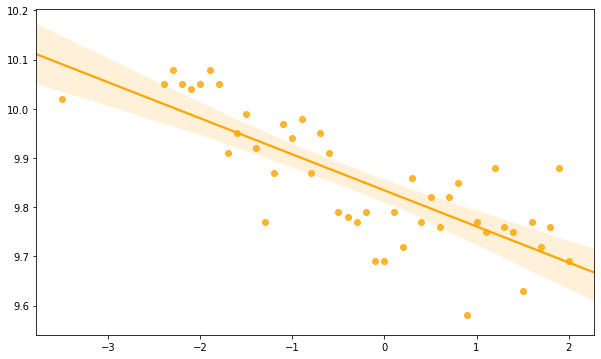

In [47]:
#Visualizations Related to Tailwind Testing 

min_bywind=by_wind.groupby('tail_wind')['winning_times'].min()

x = np.array(min_bywind.index)
y = np.array(min_bywind)

figure = plt.figure(figsize = (10, 6))
sns.regplot(x=x, y=y, color="orange")

### Hypothesis Test 2 - Age

$H_{0}$: There is no difference in the mean of runtimes of the control age group which is 27-29 with the rest of the other age groups  i.e. $\mu_{0} = \mu_{1}$

$H_{1}$: There is a significant difference in mean between the runtimes of races with different age groups

Through EDA we plotteded the fastest times for each age and generated a parabolic pattern which enabled us to create a treatment age group of 27-29 years old as this was the age with the fastest times. We then conducted a Welch T test with other treatment age groups and the p value was 0.22 which is significantly above the alpha p-value hence from our hypothesis test fail to reject the null hypothesis 

In [62]:
df['age_clean'] = df['age'].apply(lambda x: round(x,0))

In [63]:
df.head()

,winning_times,tail_wind,birth_date,country,age,age_clean
date,,,,,,
2013-04-28,10.01,0.9,1995-12-15,JPN,17.380822,17.0
2002-07-17,10.09,-0.6,1984-11-10,TTO,17.693151,18.0
2018-02-06,10.09,0.9,2000-05-09,USA,17.758904,18.0
2017-04-08,10.05,-0.6,1999-06-03,JPN,17.860274,18.0
2008-06-28,10.01,1.6,1990-08-01,USA,17.920548,18.0


In [67]:
# Selecting the fastest time for each age 
by_age = df.groupby('age_clean')['winning_times'].min()
by_age

age_clean
17.0    10.01
18.0    10.01
19.0     9.97
20.0     9.84
21.0     9.82
22.0     9.69
23.0     9.58
24.0     9.77
25.0     9.72
26.0     9.63
27.0     9.69
28.0     9.78
29.0     9.78
30.0     9.79
31.0     9.80
32.0     9.77
33.0     9.74
34.0     9.89
35.0     9.92
36.0     9.97
37.0     9.87
38.0     9.96
39.0     9.98
40.0     9.93
Name: winning_times, dtype: float64

In [68]:
# Visualisations of the age effect 
x = np.array(by_age.index)
y = np.array(by_age)


## Quadriatic equation: degree 2
### y = ax**2 + bx + c

In [69]:
# More visualizations
min_age, max_age = int(x.min()), int(x.max())
poly_coefficients = np.polyfit(x,y,2)
poly_coefficients

array([ 2.15118577e-03, -1.19256719e-01,  1.13780215e+01])

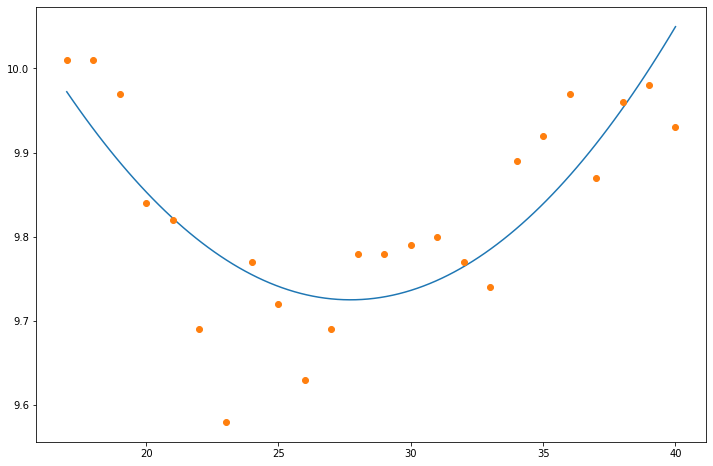

In [70]:
x_new = np.linspace(min_age,max_age,100)
y_new = np.poly1d(poly_coefficients)
_=plt.figure(figsize = (12, 8))
_=plt.plot(x_new,y_new(x_new),x,y,'o')

In [71]:
lowest_time = y_new(min_age)
best_age = min_age
for age in range(min_age,max_age):
    if lowest_time > y_new(age):
        lowest_time = y_new(age)
        best_age = age
    
print(f'minimum of best fit curve is time of {lowest_time} and age {best_age}. Therefore, we hypothesize optimal age range is 28+/-1 yr')

minimum of best fit curve is time of 9.725363043478266 and age 28. Therefore, we hypothesize optimal age range is 28+/-1 yr


In [72]:
other_ages = (df.age < 27) | (df.age > 29) #filter times for ages not 27-29
ctrl_ages = np.array(df[other_ages].winning_times)
len(ctrl_ages)

2501

In [76]:
target_ages = (df.age >=27) & (df.age <=29) # filter times for ages 27-29
expr_ages = np.array(df[target_ages].winning_times)
len(expr_ages)

309

In [77]:
#Welch's t-test
stats.ttest_ind(ctrl_ages, expr_ages, equal_var=False)

Ttest_indResult(statistic=1.2256981958196693, pvalue=0.22106171543260286)

## Findings and Analysis

In conclusion here is what we found:

1. **The Wind effect is real** -----Every 1m/s change in wind speed correlates with 0.07s change in time.  This a significant amount of effect to achieving the highest speeds and hence ablitiy to break the world records

2. **There is clear indication of optimal age to run the fastest**---While there is a clear evidence of the best age group to achieve the fastest times, in our findings there is no clear evidence yet to suggest that age impacts running the fastest times. 


## Recomendations

1. Indoor meets are preferred venue; headwinds can prevent new records.
2. We need to conduct more deeper analysis on age to find the realationship between age and achieving the fastest times. e.g Chi squared tests 
3. Get more data for additional variables e.g training, shoes, competitors